## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [4]:
df=pd.read_csv("tips.csv")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### 1. Make a list of categorical and numerical columns in the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [39]:
cat_data=[]
numerical_data= []

for i in df.columns:
    
    if df.dtypes[i]== 'int64' or df.dtypes[i]=='float64' :
        numerical_data.append(i)
    else:
        cat_data.append(i)
    
print("categorical data list = ",cat_data) 
print("numerical data list = ",numerical_data)        

categorical data list =  ['sex', 'smoker', 'day', 'time']
numerical data list =  ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [7]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [8]:
df.groupby('sex')['tip'].mean()

#male is more generous in giving tips

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [9]:
df.groupby('time')['size'].sum()


# for Dinner 463

time
Dinner    463
Lunch     164
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [10]:
df['tip'].describe()

## According to given data we can say that all groups given tip 
##According to the values of min,25%, 50%, 75%, mean, standard deviation we can conclude that the range of tip is between $1 to $4.5 
##their is a higher chances of outliers


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [11]:
df.groupby('day')['total_bill'].sum()

# Saturday is busiest day

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [12]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

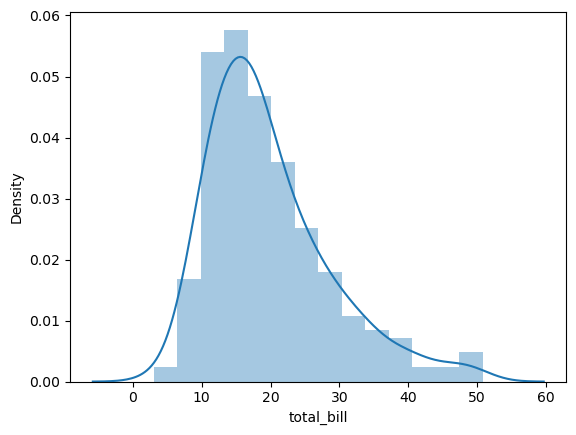

In [13]:
sns.distplot(df['total_bill'])

#yes the variable 'total_bill' is right skewed because the tail of curve is more at the right side and also value of skewness is 1.13 which is a positive 

In [14]:
df.total_bill.skew()

1.1332130376158205

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [15]:
df[['tip','total_bill']].corr()

# yes tip deped on total bill as the bill amount increases tip amount also increases .It have positive correlation between them.

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

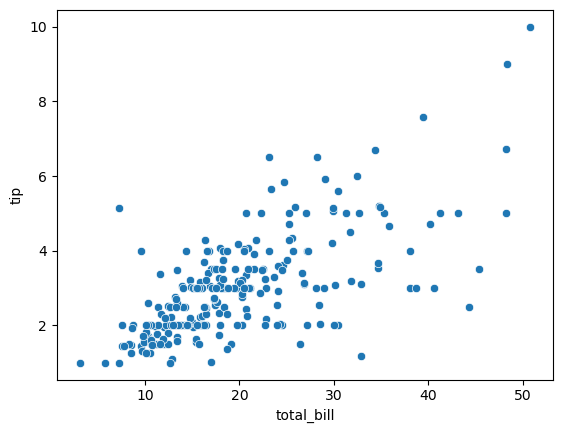

In [16]:
sns.scatterplot(x=df['total_bill'],y=df['tip'])

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [ ]:
df['sex'].value_counts().plot(kind='pie' ,autopct='%1.1f%%' )
plt.show()

<h1>10.Compute the gender-wise count based on smoking habits and dispaly it in the plot<h1>

In [18]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker'>

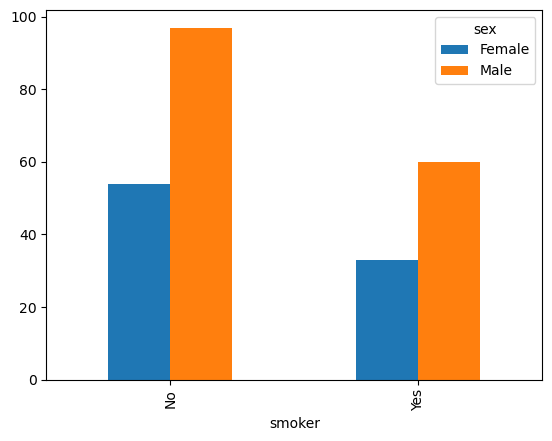

In [19]:
pd.crosstab(df['smoker'] , df['sex']).plot(kind='bar')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [20]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<AxesSubplot:xlabel='day', ylabel='tip'>

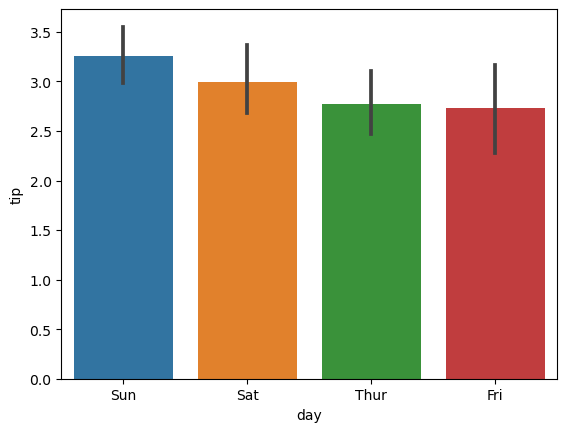

In [21]:
sns.barplot(x=df['day'], y=df['tip'])

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

<AxesSubplot:xlabel='size', ylabel='total_bill'>

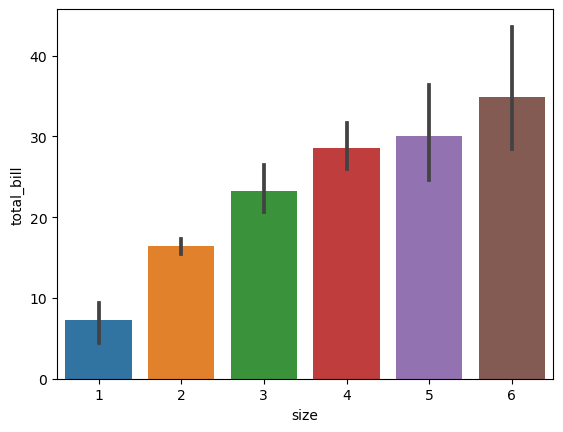

In [22]:
sns.barplot(x=df['size'], y=df['total_bill'])

# AS the size of group increases the bill amount also increases

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

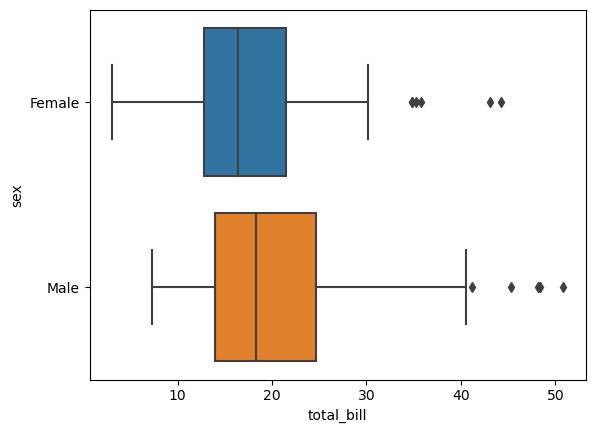

In [23]:
sns.boxplot(x=df['total_bill'], y=df['sex'])

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [24]:
df.groupby(['day','time'])['total_bill'].max()

day   time  
Fri   Dinner    40.17
      Lunch     16.27
Sat   Dinner    50.81
Sun   Dinner    48.17
Thur  Dinner    18.78
      Lunch     43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [25]:
df.isna().sum()/df.shape[0]*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [26]:
len(df[df.duplicated()])

#yes 1 duplicate data

1

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<AxesSubplot:xlabel='total_bill'>

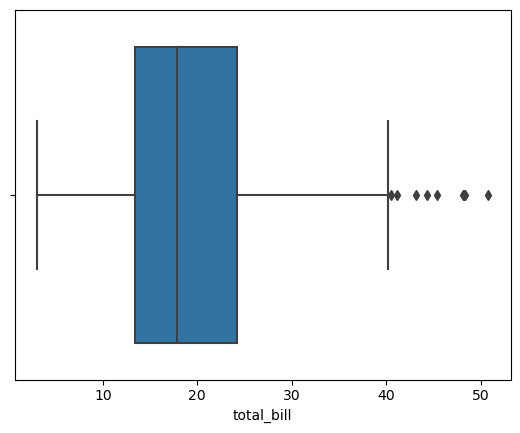

In [29]:
sns.boxplot(x=df['total_bill'])

<AxesSubplot:xlabel='bill_new'>

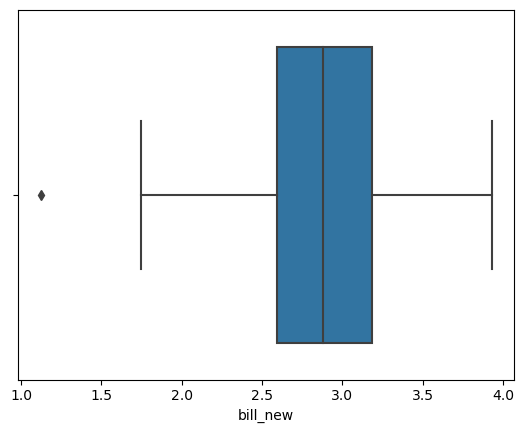

In [30]:
df['bill_new']=np.log(df['total_bill'])

sns.boxplot(x=df['bill_new'])

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<AxesSubplot:xlabel='tip'>

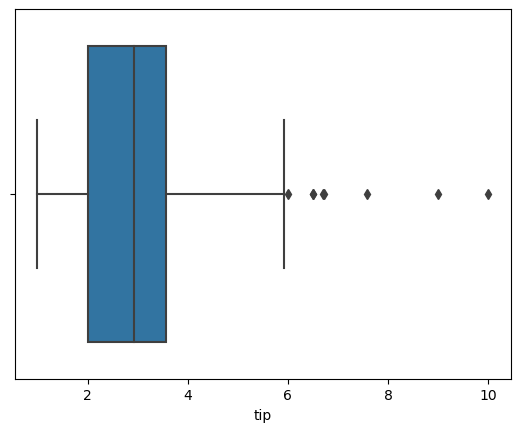

In [31]:
sns.boxplot(df['tip'])

In [32]:
q1=df['tip'].quantile(0.25)
q3=df['tip'].quantile(0.75)
iqr=q3-q1
low_whisker=q1-(1.5*iqr)
up_whisker=q3+(1.5*iqr)

In [33]:
df1= df.loc[(df['tip']<up_whisker)& (df['tip']>low_whisker)]

<AxesSubplot:xlabel='tip'>

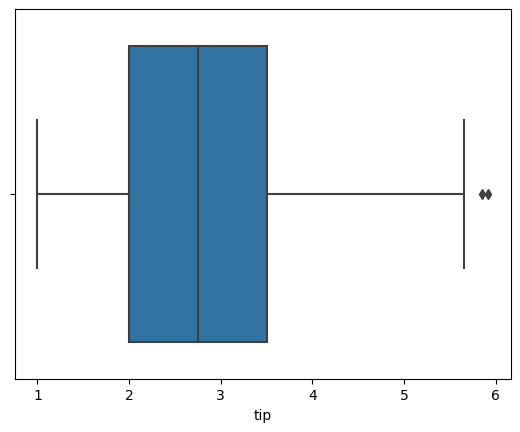

In [34]:
sns.boxplot(df1['tip'])

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [35]:

df=pd.get_dummies(df, drop_first=True)
df.sample(5)

,total_bill,tip,size,bill_new,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
183,23.17,6.50,4,3.142858,1,1,0,1,0,0
180,34.65,3.68,4,3.545298,1,1,0,1,0,0
148,9.78,1.73,2,2.280339,1,0,0,0,1,1
38,18.69,2.31,3,2.927989,1,0,1,0,0,0
233,10.77,1.47,2,2.376764,1,0,1,0,0,0


<h1> 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.<h1>

In [36]:
df['total_bill'].max()-df['total_bill'].min()

47.74

In [37]:
minmaxScale=MinMaxScaler()

df['total_bill_minmaxScale'] = minmaxScale.fit_transform(df[['total_bill']])

df['total_bill_minmaxScale'].max()-df['total_bill_minmaxScale'].min()

0.9999999999999999

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [38]:
tips_df=pd.read_csv('tips.csv')
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [40]:
tips_df=pd.get_dummies(tips_df,drop_first=True)
tips_df.head(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


In [41]:
X=tips_df.drop('tip', axis=1)
y= tips_df['tip']


In [42]:
X

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,2,0,0,0,1,0,0
1,10.34,3,1,0,0,1,0,0
2,21.01,3,1,0,0,1,0,0
3,23.68,2,1,0,0,1,0,0
4,24.59,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
239,29.03,3,1,0,1,0,0,0
240,27.18,2,0,1,1,0,0,0
241,22.67,2,1,1,1,0,0,0
242,17.82,2,1,0,1,0,0,0


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [43]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3)

mm = MinMaxScaler()

X_train.iloc[:,:2]= mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2]= mm.fit_transform(X_test.iloc[:,:2])

In [44]:
X_train.iloc[:,:2].sample(10)

,total_bill,size
38,0.327189,0.4
200,0.327608,0.4
203,0.279221,0.2
129,0.413699,0.4
65,0.356305,0.4
30,0.135735,0.2
218,0.097822,0.2
17,0.276917,0.4
10,0.150817,0.2
224,0.216799,0.2


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [45]:
lrs= LinearRegression()
lrs.fit(X_train,y_train)

LinearRegression()

In [46]:
pre=lrs.predict(X_test)

In [47]:
print("R square value ",r2_score(y_test,pre))

R square value  0.3556290865806552


### Happy Learning:)